https://www.kaggle.com/omnamahshivai/surgical-dataset-binary-classification

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('Surgical-deepnet.csv')

In [3]:
df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [4]:
df['complication'].unique()

array([0, 1], dtype=int64)

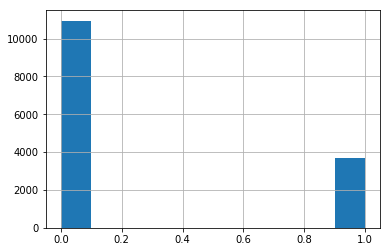

In [5]:
df['complication'].hist();

In [6]:
df['complication'].value_counts(normalize=True)

0    0.747865
1    0.252135
Name: complication, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
bmi                    14635 non-null float64
Age                    14635 non-null float64
asa_status             14635 non-null int64
baseline_cancer        14635 non-null int64
baseline_charlson      14635 non-null int64
baseline_cvd           14635 non-null int64
baseline_dementia      14635 non-null int64
baseline_diabetes      14635 non-null int64
baseline_digestive     14635 non-null int64
baseline_osteoart      14635 non-null int64
baseline_psych         14635 non-null int64
baseline_pulmonary     14635 non-null int64
ahrq_ccs               14635 non-null int64
ccsComplicationRate    14635 non-null float64
ccsMort30Rate          14635 non-null float64
complication_rsi       14635 non-null float64
dow                    14635 non-null int64
gender                 14635 non-null int64
hour                   14635 non-null float64
month                  14635 non-null int64

In [8]:
df.shape

(14635, 25)

In [9]:
labels = df['complication'] # y  - целевой признак
features = df.drop('complication', 1) # X -  матрица признаков
features.shape, labels.shape

((14635, 24), (14635,))

In [10]:
from sklearn.model_selection import train_test_split 
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 42)
features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((11708, 24), (2927, 24), (11708,), (2927,))

# GaussianNB

In [11]:
gnb = GaussianNB()
gnb.fit(features_train, labels_train);
accuracy_score(gnb.predict(features_test), labels_test)

0.7779296207721216

In [12]:
print(classification_report(labels_test, gnb.predict(features_test)))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      2237
          1       0.54      0.43      0.48       690

avg / total       0.76      0.78      0.77      2927



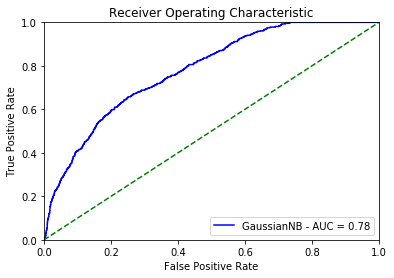

In [13]:
y_pred_gnb = gnb.predict_proba(features_test)[:,1]
fpr, tpr, thresholds = roc_curve(labels_test, y_pred_gnb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'GaussianNB - AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()
knn.fit(features_train, labels_train);
accuracy_score(knn.predict(features_test), labels_test)

0.866757772463273

In [15]:
print(classification_report(labels_test, knn.predict(features_test)))

             precision    recall  f1-score   support

          0       0.87      0.97      0.92      2237
          1       0.84      0.54      0.66       690

avg / total       0.86      0.87      0.86      2927



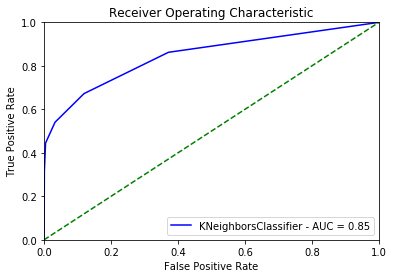

In [16]:
y_pred_knn = knn.predict_proba(features_test)[:,1]
fpr, tpr, thresholds = roc_curve(labels_test, y_pred_knn)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'KNeighborsClassifier - AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNeighborsClassifier GridSearchCV

In [17]:
knn_params = {'n_neighbors': range(5,30,5)} 
knn_grid = GridSearchCV(knn, knn_params)
knn_grid.fit( features_train, labels_train);

In [18]:
knn_grid.best_score_, knn_grid.best_params_

(0.859754014349163, {'n_neighbors': 15})

### DecisionTreeClassifier

In [19]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit( features_train, labels_train );
accuracy_score(tree.predict(features_test), labels_test)

0.8483088486504954

In [20]:
print(classification_report(labels_test, tree.predict(features_test)))

             precision    recall  f1-score   support

          0       0.86      0.96      0.91      2237
          1       0.78      0.50      0.61       690

avg / total       0.84      0.85      0.84      2927



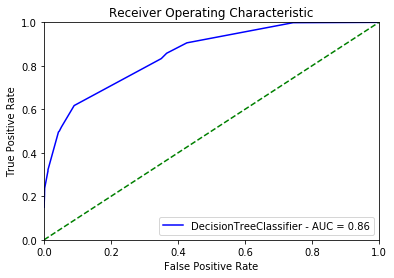

In [21]:
y_pred_tree = tree.predict_proba(features_test)[:,1]
fpr, tpr, thresholds = roc_curve(labels_test, y_pred_tree)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'DecisionTreeClassifier - AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### DecisionTreeClassifier GridSearchCV

In [22]:
tree_params = {'max_depth': np.arange(1,11), 
               'max_features': [0.5, 0.7, 1]}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1)
tree_grid.fit(features_train, labels_train);

In [23]:
tree_grid.best_score_, tree_grid.best_params_

(0.8729074137341989, {'max_depth': 10, 'max_features': 0.7})

### feature_importances

In [24]:
print("feature importances:")
print( tree.feature_importances_ )

feature importances:
[0.01073376 0.47319056 0.         0.         0.00325146 0.
 0.         0.         0.         0.         0.         0.
 0.         0.16483455 0.01979058 0.32564713 0.         0.
 0.00255197 0.         0.         0.         0.         0.        ]


In [25]:
feature_names = features.columns
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:3d}. feature '{:13s}' ({:.3f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
  1. feature 'Age          ' (0.473)
  2. feature 'complication_rsi' (0.326)
  3. feature 'ccsComplicationRate' (0.165)
  4. feature 'ccsMort30Rate' (0.020)
  5. feature 'bmi          ' (0.011)
  6. feature 'baseline_charlson' (0.003)
  7. feature 'hour         ' (0.003)
  8. feature 'baseline_osteoart' (0.000)
  9. feature 'asa_status   ' (0.000)
 10. feature 'baseline_cancer' (0.000)
 11. feature 'baseline_cvd ' (0.000)
 12. feature 'baseline_dementia' (0.000)
 13. feature 'baseline_diabetes' (0.000)
 14. feature 'baseline_digestive' (0.000)
 15. feature 'race         ' (0.000)
 16. feature 'baseline_psych' (0.000)
 17. feature 'mortality_rsi' (0.000)
 18. feature 'ahrq_ccs     ' (0.000)
 19. feature 'dow          ' (0.000)
 20. feature 'gender       ' (0.000)
 21. feature 'month        ' (0.000)
 22. feature 'moonphase    ' (0.000)
 23. feature 'mort30       ' (0.000)
 24. feature 'baseline_pulmonary' (0.000)


Построим столбцовую диаграмму, графически представляющую значимость первых 5 признаков:

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

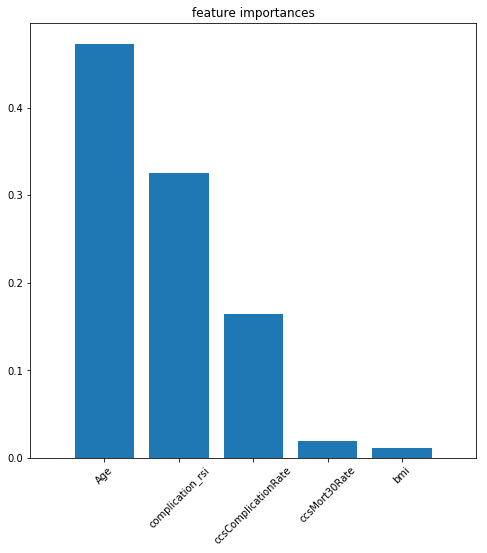

In [27]:
d_first = 5
plt.figure(figsize=(8, 8))
plt.title("feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=45)
plt.xlim([-1, d_first]);

### RandomForestClassifier

In [28]:
rf = ensemble.RandomForestClassifier(n_estimators=100,random_state=11)
rf.fit(features_train, labels_train)
accuracy_score(rf.predict(features_test), labels_test)

0.8650495387769047

In [29]:
print(classification_report(labels_test, rf.predict(features_test)))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91      2237
          1       0.78      0.60      0.68       690

avg / total       0.86      0.87      0.86      2927



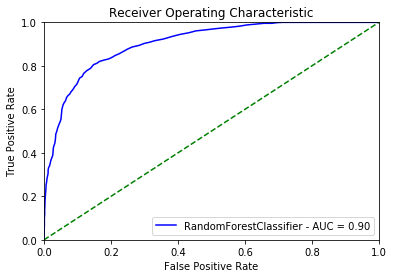

In [30]:
y_pred_rf = rf.predict_proba(features_test)[:,1]
fpr, tpr, thresholds = roc_curve(labels_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'RandomForestClassifier - AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###  GridSearchCV 

In [31]:
forest_params = {'max_depth': range(1,11),'max_features': range(4,19)}
forest_grid = GridSearchCV(rf, forest_params, cv = 5, n_jobs = -1, verbose = True)
forest_grid.fit( features_train, labels_train )

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [32]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 10, 'max_features': 18}, 0.8981038606081312)

# GradientBoostingClassifier 

In [33]:
model_GBC = GradientBoostingClassifier()
model_GBC.fit(features_train, labels_train)
accuracy_score(model_GBC.predict(features_test), labels_test)

0.9132217287324906

In [34]:
print(classification_report(labels_test, model_GBC.predict(features_test)))

             precision    recall  f1-score   support

          0       0.91      0.98      0.95      2237
          1       0.91      0.70      0.79       690

avg / total       0.91      0.91      0.91      2927



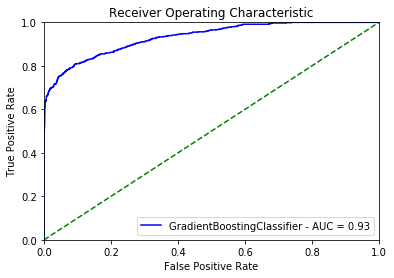

In [35]:
y_pred_model_GBC = model_GBC.predict_proba(features_test)[:,1]
fpr, tpr, thresholds = roc_curve(labels_test, y_pred_model_GBC)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'GradientBoostingClassifier - AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Result

GradientBoostingClassifier 
                дал наилучший результат 0.9132217287324906                 
для выбранного датасета. 

In [36]:
print ('GradientBoostingClassifier - AUC = %0.2f' % roc_auc)

GradientBoostingClassifier - AUC = 0.93
